<a href="https://colab.research.google.com/github/vivek-varshney/TamilNadu_Electricity_Consumption/blob/main/TamilNadu_Electricity_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [3]:
doc_file = open('/content/drive/MyDrive/data/eb.arff')
#print(doc_file.read())

In [66]:
file1 = pd.read_csv('/content/drive/MyDrive/data/eb.arff',header = None,skiprows=range(0,12), skipfooter=3, usecols=[0,1,2], names = ['kVA','kW','Type'])
file1

,kVA,kW,Type
0,0.865936,0.143763,Bank
1,0.129804,0.088930,Bank
2,0.061801,0.552047,Bank
3,0.099116,0.848172,Bank
4,0.205704,0.624722,Bank
...,...,...,...
45776,0.815382,0.822821,University
45777,0.821317,0.439967,University
45778,0.523061,0.227777,University
45779,0.925497,0.386428,University


In [ ]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45781 entries, 0 to 45780
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kVA     45781 non-null  float64
 1   kW      45781 non-null  float64
 2   Type    45781 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.0+ MB


In [67]:
grp_data = file1.groupby('Type')

In [68]:
grp_data.first()

,kVA,kW
Type,,
AutomobileIndustry,0.491400,0.999933
Bank,0.865936,0.143763
BpoIndustry,0.777596,0.534225
CementIndustry,0.454860,0.817052
ChemicalIndustry,0.838096,0.972833
Farmers1,0.392965,0.911057
Farmers2,0.279811,0.343923
FertilizerIndustry,0.258009,0.397516
FoodIndustry,0.886415,0.525572


In [ ]:
file1[file1['Type'] =='Bank']

,kVA,kW,Type
0,0.865936,0.143763,Bank
1,0.129804,0.088930,Bank
2,0.061801,0.552047,Bank
3,0.099116,0.848172,Bank
4,0.205704,0.624722,Bank
...,...,...,...
1405,0.801479,0.594975,Bank
1406,0.120187,0.297931,Bank
1407,0.942743,0.724593,Bank
1408,0.489427,0.841497,Bank


In [ ]:
lst = ['Bank' , 'AutomobileIndustry' , 'BpoIndustry' , 'CementIndustry' , 'Farmers1' , 'Farmers2' , 'HealthCareResources' , 'TextileIndustry' , 'PoultryIndustry' , 'Residential(individual)' , 'Residential(Apartments)' , 'FoodIndustry' , 'ChemicalIndustry' , 'Handlooms' , 'FertilizerIndustry' ,'Hostel' ,'Hospital' , 'Supermarket', 'Theatre' , 'University']
for i in lst:
   globals()['data_%s' %i]= file1[file1['Type'] == i]
  

In [69]:
lst = ['Bank' , 'AutomobileIndustry' , 'BpoIndustry' , 'CementIndustry' , 'Farmers1' , 'Farmers2' , 'HealthCareResources' , 'TextileIndustry' , 'PoultryIndustry' , 'Residential(individual)' , 'Residential(Apartments)' , 'FoodIndustry' , 'ChemicalIndustry' , 'Handlooms' , 'FertilizerIndustry' ,'Hostel' ,'Hospital' , 'Supermarket', 'Theatre' , 'University']
for i in lst:
  print(i)
  print(grp_data.get_group(i))
  print('\n')
  

Bank
           kVA        kW
0     0.865936  0.143763
1     0.129804  0.088930
2     0.061801  0.552047
3     0.099116  0.848172
4     0.205704  0.624722
...        ...       ...
1405  0.801479  0.594975
1406  0.120187  0.297931
1407  0.942743  0.724593
1408  0.489427  0.841497
1409  0.470310  0.429366

[1410 rows x 2 columns]


AutomobileIndustry
           kVA        kW
1410  0.491400  0.999933
1411  0.076526  0.281727
1412  0.875158  0.464859
1413  0.649913  0.193134
1414  0.787578  0.669413
...        ...       ...
2808  0.044503  0.006286
2809  0.718101  0.513088
2810  0.295946  0.238140
2811  0.513819  0.701231
2812  0.127666  0.027033

[1403 rows x 2 columns]


BpoIndustry
           kVA        kW
2813  0.777596  0.534225
2814  0.108622  0.457123
2815  0.419066  0.642565
2816  0.877316  0.048765
2817  0.875277  0.775392
...        ...       ...
4205  0.670902  0.277423
4206  0.625150  0.802957
4207  0.707363  0.865572
4208  0.440435  0.094475
4209  0.455654  0.094511

[1397 row

In [85]:
Bank = grp_data.get_group('Bank')
AutomobileIndustry = grp_data.get_group('AutomobileIndustry')
BpoIndustry = grp_data.get_group('BpoIndustry')
CementIndustry = grp_data.get_group('CementIndustry')
Farmers1 = grp_data.get_group('Farmers1')
Farmers2 = grp_data.get_group('Farmers2')
HealthCareResources = grp_data.get_group('HealthCareResources')
TextileIndustry = grp_data.get_group('TextileIndustry')
PoultryIndustry = grp_data.get_group('PoultryIndustry')
Residential_individual = grp_data.get_group('Residential(individual)') #
Residential_Apartments = grp_data.get_group('Residential(Apartments)') #
FoodIndustry = grp_data.get_group('FoodIndustry')
ChemicalIndustry = grp_data.get_group('ChemicalIndustry')
Handlooms = grp_data.get_group('Handlooms')
FertilizerIndustry = grp_data.get_group('FertilizerIndustry')
Hostel = grp_data.get_group('Hostel')
Hospital = grp_data.get_group('Hospital')
Theatre = grp_data.get_group('Theatre')
Supermarket = grp_data.get_group('Supermarket')
University = grp_data.get_group('University')


In [ ]:
Bank

,kVA,kW
0,0.865936,0.143763
1,0.129804,0.088930
2,0.061801,0.552047
3,0.099116,0.848172
4,0.205704,0.624722
...,...,...
1405,0.801479,0.594975
1406,0.120187,0.297931
1407,0.942743,0.724593
1408,0.489427,0.841497


In [ ]:
Bank.mean(axis=0)

kVA    0.496780
kW     0.494952
dtype: float64

In [ ]:
Bank.describe()

,kVA,kW
count,1410.000000,1410.000000
mean,0.496780,0.494952
std,0.288078,0.293800
min,0.001359,0.000238
25%,0.247386,0.238101
50%,0.492197,0.494332
75%,0.751706,0.749432
max,0.999996,0.999236


#DATA Preprocesing

In [86]:
X = Bank.iloc[:,0].values
y = Bank.iloc[:,1].values

In [87]:
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

#Now Train model in Regression

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [90]:
pipeline_lr = Pipeline([('Lr',LinearRegression())])
pipeline_DT = Pipeline([('DT',DecisionTreeRegressor(random_state = 0))])
pipeline_RF  =Pipeline([('RF',RandomForestRegressor(random_state = 0))])
pipeline_SVR =Pipeline([('SVR',SVR(kernel='rbf'))])

In [91]:
pipeline = [pipeline_lr,pipeline_DT,pipeline_RF,pipeline_SVR]

for i in pipeline:
  i.fit(X_train,y_train)

In [92]:
from sklearn.model_selection import cross_val_score
def reg_scores(reg, independent, dependent):
  scores = cross_val_score(reg, independent, dependent,
                           scoring = 'neg_mean_squared_error',cv = 10, n_jobs=-1)
  scores = np.sqrt(-scores)
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [93]:
full_pipeline_str = ['Linear Regression','Dession Tree','Random Forest','SVC']

from sklearn import metrics
for i,j in zip(pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('R2:', metrics.r2_score(y_test, y_pred))

  reg_scores(i,X_train,y_train)
  print('\n\n')

Linear Regression :-
Mean Absolute Error: 0.2522613225871906
Mean Squared Error: 0.08600233287902512
Root Mean Squared Error: 0.2932615434710544
R2: -0.0003308677785376357
Scores: [0.31010708 0.28887324 0.29510013 0.29465392 0.29388296 0.28592649
 0.27673284 0.28813861 0.30535204 0.3010818 ]
Mean: 0.293984909668845
Standard deviation: 0.009295612137558284



Dession Tree :-
Mean Absolute Error: 0.35341763330583065
Mean Squared Error: 0.18639294425813313
Root Mean Squared Error: 0.43173249154787174
R2: -1.168018115738914
Scores: [0.41663629 0.4418529  0.47000098 0.40272462 0.40842072 0.39444349
 0.39919126 0.42962154 0.39259608 0.42021624]
Mean: 0.41757041187006594
Standard deviation: 0.023004751778409344



Random Forest :-
Mean Absolute Error: 0.29997417147893396
Mean Squared Error: 0.13174679720231267
Root Mean Squared Error: 0.36296941634566493
R2: -0.5324048029931343
Scores: [0.36365349 0.36530319 0.39558558 0.34890103 0.35473009 0.32939909
 0.33658245 0.37206459 0.35382762 0.36383

Linear Regression

In [94]:
X_train.shape

(1128, 1)

In [95]:
y_train=y_train.ravel()

In [96]:
y_train.shape

(1128,)

In [97]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.2932615434710544
R2: -0.0003308677785376357


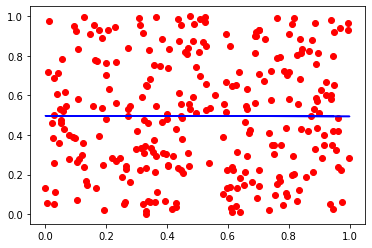

In [99]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue');

In [100]:
reg_scores(regressor,X_train,y_train)

Scores: [0.31010708 0.28887324 0.29510013 0.29465392 0.29388296 0.28592649
 0.27673284 0.28813861 0.30535204 0.3010818 ]
Mean: 0.293984909668845
Standard deviation: 0.009295612137558284


Random Forest

In [101]:
regressor = RandomForestRegressor(random_state = 0,n_estimators=50)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [102]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.3637594396358179
R2: -0.5390827925853205


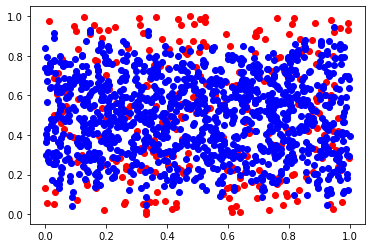

In [103]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue');

In [104]:
reg_scores(regressor,X_train,y_train)

Scores: [0.36402275 0.36625059 0.39345472 0.35178281 0.35622373 0.32619422
 0.33136587 0.37192128 0.35457196 0.3627388 ]
Mean: 0.3578526726378793
Standard deviation: 0.018308381207134967


SVR

In [105]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.2933438635721719
R2: -0.00089254316824805


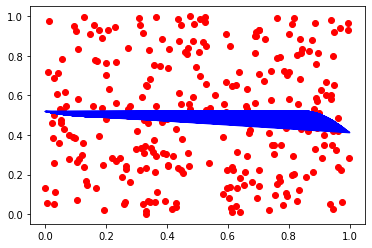

In [107]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue');

###Hyperparameter Tuning Using Grid SearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

param = [{'kernel' : ['rbf', 'poly', 'sigmoid'],'C' : [0.25,0.5,0.75,1],'gamma' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = param,
                           cv = 5,verbose = 2,
                           n_jobs = -1) #use all process 
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.10f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.3s


Best Accuracy: -0.4794465413 %
Best Parameters: {'C': 0.5, 'gamma': 0.1, 'kernel': 'poly'}


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   19.2s finished


now again train model with best values

In [109]:
regressor = SVR(kernel='poly',gamma=0.1, C=0.5)
regressor.fit(X_train, y_train)

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [110]:
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 0.2932512371036773
R2: -0.00026055786925471836


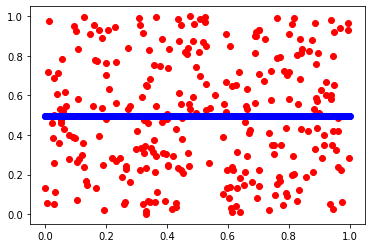

In [111]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_train, regressor.predict(X_train), color = 'blue');

In [112]:
reg_scores(regressor,X_train,y_train)

Scores: [0.31053862 0.28874848 0.29513188 0.29376665 0.29370567 0.28620857
 0.27656625 0.2877524  0.30534818 0.30109432]
Mean: 0.29388610072344734
Standard deviation: 0.00940840936808707


AutomobileIndustry

In [113]:
AutomobileIndustry

,kVA,kW
1410,0.491400,0.999933
1411,0.076526,0.281727
1412,0.875158,0.464859
1413,0.649913,0.193134
1414,0.787578,0.669413
...,...,...
2808,0.044503,0.006286
2809,0.718101,0.513088
2810,0.295946,0.238140
2811,0.513819,0.701231


In [114]:
X = AutomobileIndustry.iloc[:,0].values
y = AutomobileIndustry.iloc[:,1].values

In [115]:
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [117]:
pipeline = [pipeline_lr,pipeline_DT,pipeline_RF,pipeline_SVR]

for i in pipeline:
  i.fit(X_train,y_train)

In [118]:
full_pipeline_str = ['Linear Regression','Dession Tree','Random Forest','SVC']

from sklearn import metrics
for i,j in zip(pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('R2:', metrics.r2_score(y_test, y_pred))

  reg_scores(i,X_train,y_train)
  print('\n\n')

Linear Regression :-
Mean Absolute Error: 0.2466258614016338
Mean Squared Error: 0.08094991318088807
Root Mean Squared Error: 0.28451698223636507
R2: -0.00864467794942314
Scores: [0.27524671 0.28437543 0.30722513 0.26352566 0.26947508 0.30358376
 0.29204001 0.30670029 0.27996986 0.30336293]
Mean: 0.28855048662536725
Standard deviation: 0.015472246589383329



Dession Tree :-
Mean Absolute Error: 0.3356995170766735
Mean Squared Error: 0.1701892573458783
Root Mean Squared Error: 0.4125400069640256
R2: -1.120576562972933
Scores: [0.4122247  0.40990931 0.3924075  0.39982441 0.40795322 0.41277497
 0.37372389 0.39678666 0.39845784 0.40124429]
Mean: 0.4005306793241726
Standard deviation: 0.01110692675663807



Random Forest :-
Mean Absolute Error: 0.2970921266638411
Mean Squared Error: 0.12871581755788172
Root Mean Squared Error: 0.3587698671263819
R2: -0.6038130153093022
Scores: [0.34321547 0.34106743 0.34227453 0.34210721 0.35018895 0.36465742
 0.33285073 0.34772748 0.33611461 0.35745651]
M

#Now Train model in Classification

In [119]:
X = file1.iloc[:,:-1].values
y = file1.iloc[:,-1].values

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [121]:
y.shape

(45781,)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [126]:
pipeline_LC  = Pipeline([('LogisticReg',LogisticRegression(random_state = 10))])
pipeline_DTC = Pipeline([('DTC',DecisionTreeClassifier(criterion = 'entropy', random_state = 10))])
pipeline_RFC = Pipeline([('RFC',RandomForestClassifier(random_state = 10))])
pipeline_SVC = Pipeline([('SVM',SVC(kernel='rbf'))])
pipeline_KNC = Pipeline([('KNN',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))])
pipeline_NBC = Pipeline([('GNB',GaussianNB())])

In [78]:
pipeline = [pipeline_LC,pipeline_DTC,pipeline_RFC,pipeline_SVC,pipeline_KNC,pipeline_NBC]

for i in pipeline:
  i.fit(X_train,y_train)

In [82]:
from sklearn.model_selection import cross_val_score
def accu_scores(reg, independent, dependent):
  accuracies  = cross_val_score(reg, independent, dependent,cv = 10, n_jobs=-1)
  print("Scores:", accuracies)
  print("Kfold Accuracy: {:.2f} %".format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [84]:
full_pipeline_str = ['Logistic Regression','Dession Tree','Random Forest','SVM','KNN','Navie Bayse']

from sklearn.metrics import confusion_matrix, accuracy_score
for i,j in zip(pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  accu_scores(i,X_train,y_train)
  #cm = confusion_matrix(y_test, y_pred)
  #print(cm)
  print("Accuracy: {:.4f} %".format(accuracy_score(y_test, y_pred)*100))
  print("\n\n")

Logistic Regression :-
Scores: [0.06415506 0.06360906 0.06470106 0.06360906 0.06335336 0.06417258
 0.06526488 0.05898416 0.05898416 0.06471873]
Kfold Accuracy: 6.32 %
Standard Deviation: 0.22 %
Accuracy: 6.4104 %



Dession Tree :-
Scores: [0.05050505 0.04968605 0.04968605 0.05760306 0.05516111 0.06171491
 0.05761879 0.05598034 0.05625341 0.05079192]
Kfold Accuracy: 5.45 %
Standard Deviation: 0.39 %
Accuracy: 4.8051 %



Random Forest :-
Scores: [0.05487305 0.05268905 0.05214305 0.05705706 0.05324959 0.05980339
 0.05079192 0.05570726 0.05379574 0.05652649]
Kfold Accuracy: 5.47 %
Standard Deviation: 0.25 %
Accuracy: 5.4385 %



SVM :-
Scores: [0.05896806 0.05951406 0.06224406 0.06688507 0.06308028 0.06581103
 0.06690333 0.06308028 0.06335336 0.06198798]
Kfold Accuracy: 6.32 %
Standard Deviation: 0.26 %
Accuracy: 6.3776 %



KNN :-
Scores: [0.04668305 0.04504505 0.04941305 0.04886705 0.04423812 0.04888039
 0.05161114 0.04778809 0.04806117 0.05270344]
Kfold Accuracy: 4.83 %
Standard Devia

#Now Train model in Clustring

In [ ]:
X = file1.iloc[:,:-1].values
y = file1.iloc[:,-1].values

In [ ]:
X.shape

(45781, 2)

##Plot dendogram

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # Minimum variance method
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X_new)

##Plot KMeans

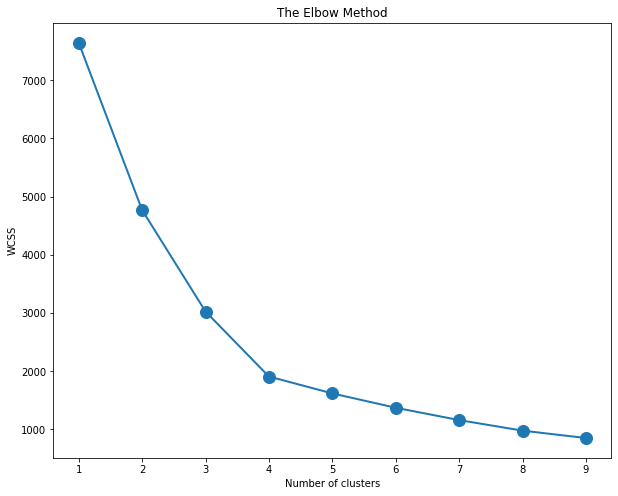

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1, 10), wcss, marker='o', linewidth=2, markersize=12)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

According to above graph 4 cluster is the best option to divide the data.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

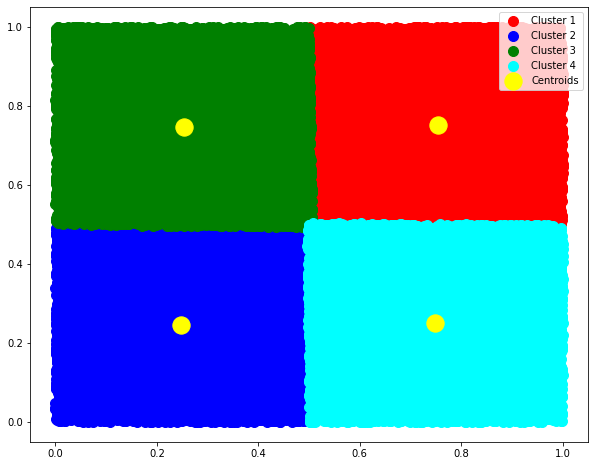

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend();

In [ ]:
y_kmeans

array([3, 1, 2, ..., 3, 3, 3], dtype=int32)

In [ ]:
kmeans.predict([[0.489427,0.841497],[0.875158,0.464859]])+

array([2, 3], dtype=int32)

In [ ]:
file1

,kVA,kW,Type
0,0.865936,0.143763,Bank
1,0.129804,0.088930,Bank
2,0.061801,0.552047,Bank
3,0.099116,0.848172,Bank
4,0.205704,0.624722,Bank
...,...,...,...
45776,0.815382,0.822821,University
45777,0.821317,0.439967,University
45778,0.523061,0.227777,University
45779,0.925497,0.386428,University


In [ ]:
cluster = []
for i in X:
  z = kmeans.predict([i])[0]
  cluster.append(z)

In [ ]:
cluster

[3,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 1,
 3,
 1,
 0,
 3,
 1,
 3,
 0,
 2,
 1,
 0,
 3,
 0,
 2,
 0,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 0,
 3,
 2,
 1,
 0,
 3,
 1,
 1,
 3,
 3,
 2,
 0,
 2,
 2,
 3,
 1,
 0,
 1,
 2,
 3,
 3,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 3,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 3,
 3,
 1,
 0,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 3,
 1,
 3,
 0,
 1,
 2,
 0,
 2,
 2,
 3,
 2,
 0,
 2,
 0,
 0,
 0,
 3,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 3,
 1,
 0,
 2,
 2,
 3,
 0,
 3,
 2,
 3,
 3,
 2,
 1,
 0,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 1,
 2,
 2,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 3,
 3,
 2,
 3,
 3,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 3,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 3,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 0,
 3,
 0,
 1,
 2,
 2,
 0,
 3,
 0,
 3,
 3,
 2,
 1,
 3,
 1,
 2,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 3,
 2,
 1,
 0,
 3,
 2,
 2,
 2,
 1,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 0,
 1,
 2,
 2,
 1,


In [ ]:
file1['Cluster'] = cluster

In [ ]:
total_count = file1['Type'].value_counts()
total_count

Hospital                   2906
FoodIndustry               2905
University                 2896
PoultryIndustry            2888
Handlooms                  2887
Residential(Apartments)    2884
FertilizerIndustry         2876
Supermarket                2874
Theatre                    2870
Residential(individual)    2867
Hostel                     2857
ChemicalIndustry           2830
Farmers1                   1418
Bank                       1410
TextileIndustry            1405
Farmers2                   1405
CementIndustry             1403
AutomobileIndustry         1403
HealthCareResources        1400
BpoIndustry                1397
Name: Type, dtype: int64

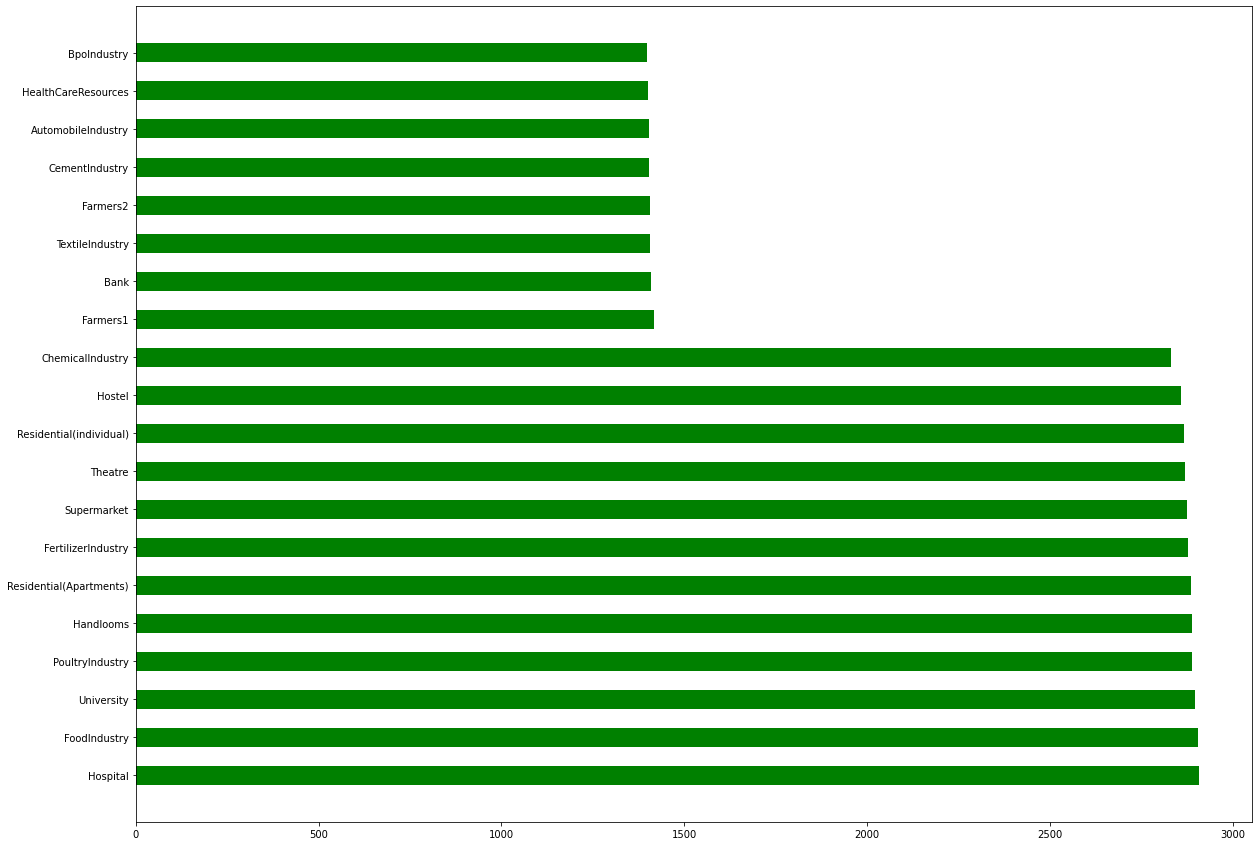

In [ ]:
plt.figure(figsize=(20,15))
plt.barh(total_count.keys().values,total_count,height=0.5,color=['green']);

In [ ]:
cluster_0 = file1[file1['Cluster']==0]

In [ ]:
cluster_0.describe

<bound method NDFrame.describe of             kVA        kW        Type  Cluster
11     0.940152  0.981297        Bank        0
15     0.860208  0.671408        Bank        0
18     0.695464  0.992786        Bank        0
20     0.658742  0.874708        Bank        0
22     0.721738  0.631548        Bank        0
...         ...       ...         ...      ...
45761  0.781747  0.684059  University        0
45768  0.906085  0.721175  University        0
45769  0.508465  0.569024  University        0
45775  0.594639  0.741307  University        0
45776  0.815382  0.822821  University        0

[11372 rows x 4 columns]>

In [ ]:
cluster0_cnt = np.round(cluster_0['Type'].value_counts(normalize= True)*100,2)
cluster0_cnt

FertilizerIndustry         6.77
Hostel                     6.43
ChemicalIndustry           6.43
Residential(individual)    6.41
Residential(Apartments)    6.39
University                 6.39
Theatre                    6.33
Supermarket                6.25
FoodIndustry               6.23
Hospital                   6.12
PoultryIndustry            5.74
Handlooms                  5.66
CementIndustry             3.27
BpoIndustry                3.27
Bank                       3.22
Farmers1                   3.12
TextileIndustry            3.08
AutomobileIndustry         3.06
Farmers2                   2.94
HealthCareResources        2.88
Name: Type, dtype: float64

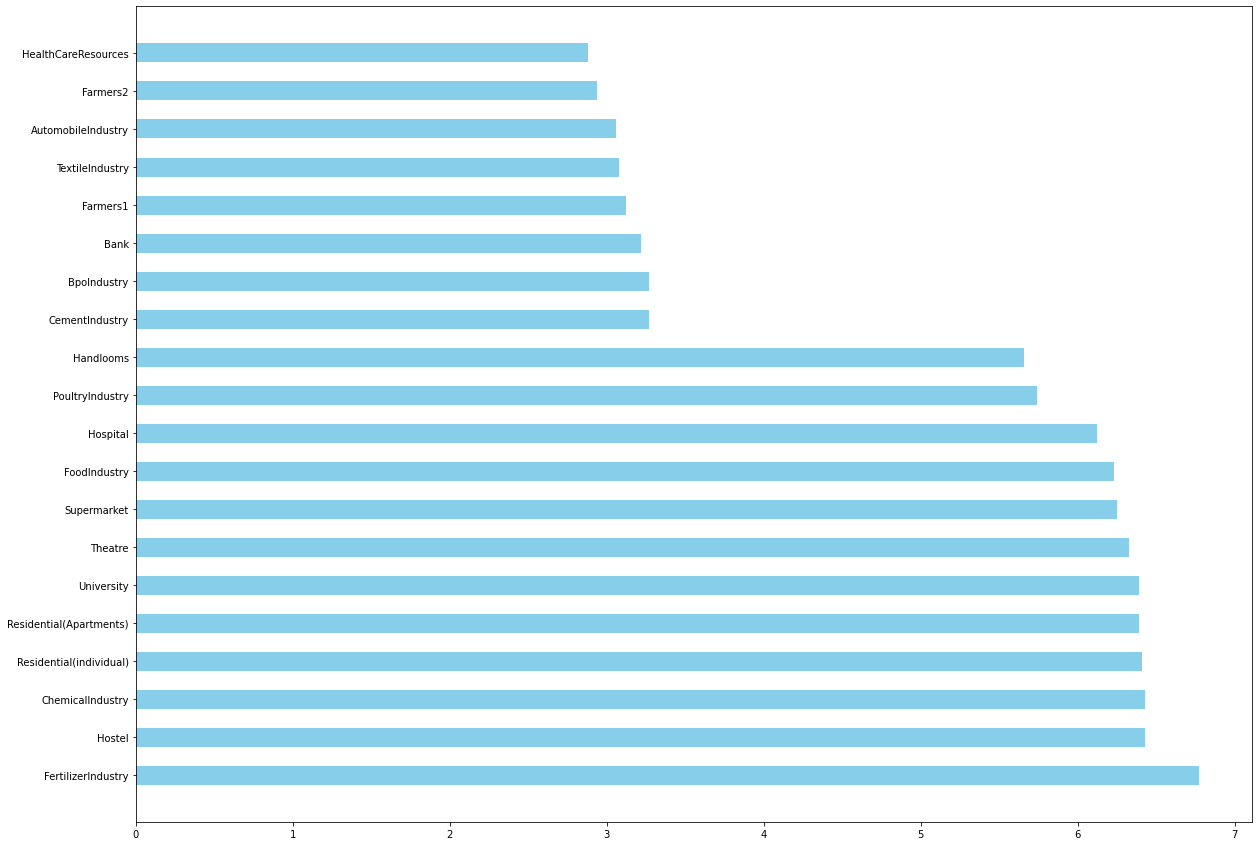

In [ ]:
plt.figure(figsize=(20,15))
plt.barh(cluster0_cnt.keys().values,cluster0_cnt,height=0.5,color=['skyblue']);

In [ ]:
cluster_1 = file1[file1['Cluster']==1]
cluster_1.info

<bound method DataFrame.info of             kVA        kW        Type  Cluster
1      0.129804  0.088930        Bank        1
5      0.164029  0.038168        Bank        1
17     0.107628  0.309156        Bank        1
25     0.171748  0.085911        Bank        1
27     0.259692  0.051687        Bank        1
...         ...       ...         ...      ...
45733  0.019176  0.100645  University        1
45746  0.155685  0.062193  University        1
45759  0.031560  0.069771  University        1
45766  0.219228  0.068273  University        1
45772  0.131527  0.119815  University        1

[5012 rows x 4 columns]>

In [ ]:
cluster1_cnt = np.round(cluster_1['Type'].value_counts(normalize= True)*100,2)
cluster1_cnt

Handlooms                  6.74
FertilizerIndustry         6.72
Residential(Apartments)    6.66
University                 6.52
Supermarket                6.38
Theatre                    6.28
FoodIndustry               6.23
PoultryIndustry            6.17
Hostel                     6.15
Hospital                   6.09
ChemicalIndustry           6.07
Residential(individual)    5.81
TextileIndustry            3.29
AutomobileIndustry         3.27
Farmers1                   3.19
Bank                       3.09
Farmers2                   2.97
HealthCareResources        2.91
CementIndustry             2.75
BpoIndustry                2.69
Name: Type, dtype: float64

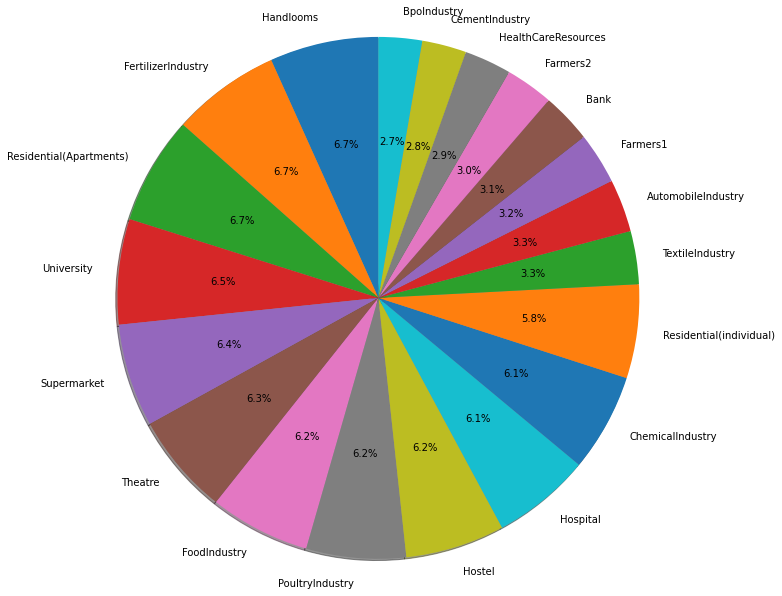

In [ ]:
plt.pie(cluster1_cnt.values,radius = 3,labels=cluster1_cnt.keys().values,shadow=True,
        autopct='%.1f%%',startangle = 90);

In [ ]:
cluster_2 = file1[file1['Cluster']==2]

In [ ]:
cluster2_cnt = np.round(cluster_2['Type'].value_counts(normalize= True)*100,2)
cluster2_cnt

University                 6.77
Handlooms                  6.73
FoodIndustry               6.68
Hospital                   6.50
ChemicalIndustry           6.37
FertilizerIndustry         6.29
Residential(Apartments)    6.25
PoultryIndustry            6.22
Residential(individual)    6.16
Supermarket                6.08
Theatre                    6.04
Hostel                     5.85
Farmers1                   3.31
BpoIndustry                3.23
TextileIndustry            3.23
Farmers2                   3.06
Bank                       3.00
AutomobileIndustry         2.85
CementIndustry             2.68
HealthCareResources        2.68
Name: Type, dtype: float64

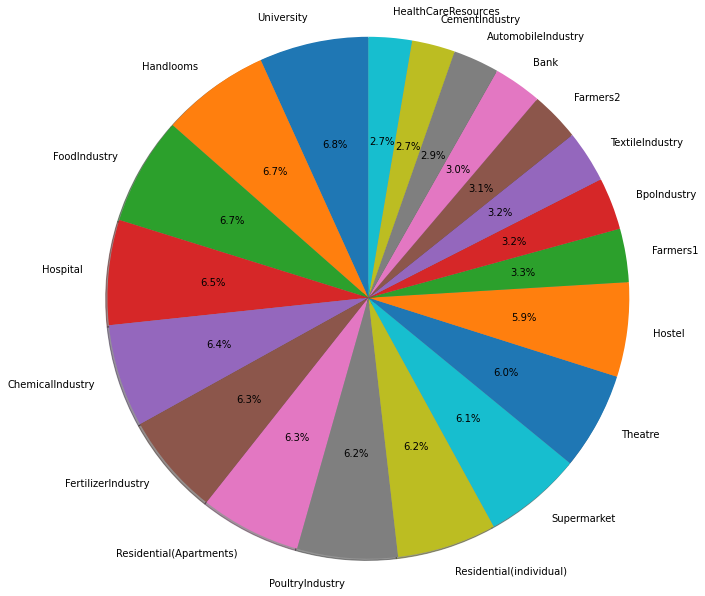

In [ ]:
plt.pie(cluster2_cnt.values,radius = 3,labels=cluster2_cnt.keys().values,shadow=True,
        autopct='%.1f%%',startangle = 90);

In [ ]:
cluster_3 = file1[file1['Cluster']==3]
cluster_3.value_counts()

kVA       kW        Type                     Cluster
0.335649  0.685433  BpoIndustry              3          1
0.112293  0.701974  Supermarket              3          1
0.111764  0.823016  Supermarket              3          1
0.111778  0.896414  University               3          1
0.111866  0.756798  Residential(Apartments)  3          1
                                                       ..
0.221745  0.842522  TextileIndustry          3          1
0.221902  0.703989  Theatre                  3          1
0.221943  0.785199  ChemicalIndustry         3          1
0.222009  0.962374  HealthCareResources      3          1
0.000005  0.815392  FoodIndustry             3          1
Length: 5107, dtype: int64

In [ ]:
cluster3_cnt = np.round(cluster_3['Type'].value_counts(normalize= True)*100,2)
cluster3_cnt

Theatre                    6.72
Supermarket                6.58
Hospital                   6.48
PoultryIndustry            6.42
Residential(individual)    6.32
FertilizerIndustry         6.29
FoodIndustry               6.27
Handlooms                  6.11
Residential(Apartments)    6.09
University                 6.03
Hostel                     6.01
ChemicalIndustry           5.87
Farmers2                   3.68
BpoIndustry                3.23
AutomobileIndustry         3.17
Bank                       3.09
HealthCareResources        2.98
CementIndustry             2.98
Farmers1                   2.96
TextileIndustry            2.72
Name: Type, dtype: float64

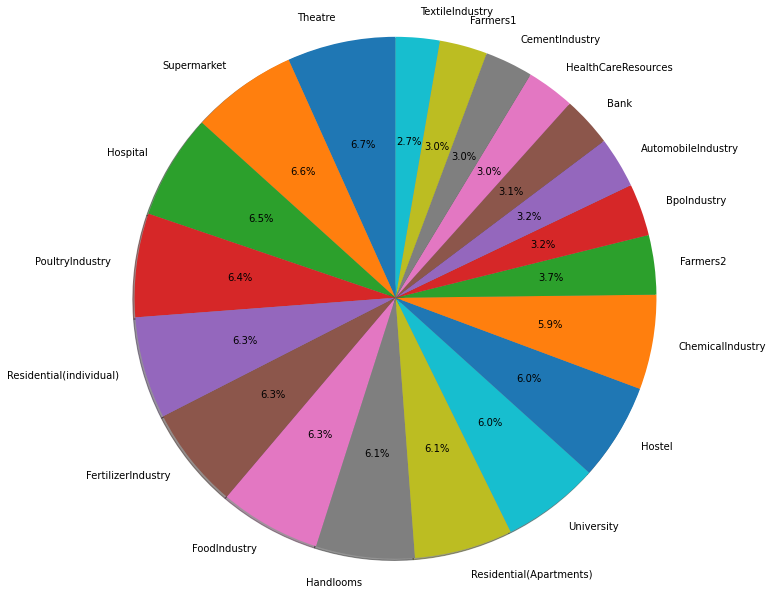

In [ ]:
plt.pie(cluster3_cnt.values,radius = 3,labels=cluster3_cnt.keys().values,shadow=True,
        autopct='%.1f%%',startangle = 90);